# **GeoPandas**
**Author: Krishnagopal Halder**<br>

Geopandas is an open-source Python library that extends the capabilities of the popular data analysis library, pandas, by adding geospatial data processing and manipulation capabilities. It provides a convenient and efficient way to work with geospatial data, such as points, lines, and polygons, within the pandas DataFrame structure.

Geopandas leverages the functionalities of other powerful geospatial libraries, including Shapely, Fiona, and Pyproj, to handle geometric operations, file I/O, and coordinate transformations, respectively. By integrating these libraries, Geopandas simplifies the process of reading, manipulating, analyzing, and visualizing geospatial data.

## **01. Importing Required Libraries**

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import matplotlib.pyplot as plt

## **02. Setting Up the Working Directory**

In [2]:
# Checking the current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\02_Exploring_Geospatial_Packages'

In [3]:
# Change the current working directory
file_path =  r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets\Shapafiles"
os.chdir(file_path)

In [4]:
# Checking the current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets\\Shapafiles'

## **03. Reading and Writing Spatial Data with GeoPandas**

In [5]:
# Reading data from local file
land = gpd.read_file(file_path+"\\ne_10m_land.shp")

In [6]:
# Reading data from URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
land_url = gpd.read_file(url)

**Dataset Description:**<br>
* **TIGER/Line Shapefiles**: TIGER/Line Shapefiles, commonly referred to as TIGER shapefiles or simply TIGER files, are a set of geospatial data files provided by the United States Census Bureau. TIGER stands for Topologically Integrated Geographic Encoding and Referencing. In TIGER shapefiles, the "US TIGER State data" refers to the boundaries and associated attributes of individual states within the United States. It represents the geographic extent of each state and provides information about their administrative divisions. The core TIGER/Line Files and Shapefiles do not include demographic data, but they do contain geographic entity codes (GEOIDs) that can be linked to the Census Bureau’s demographic data, available on [data.census.gov.](https://data.census.gov/)

* **Core Based Statistical Areas (CBSA):** Core Based Statistical Areas (CBSAs) provides the geographic boundaries and point information for more than 900 statistical regions defined by the U.S. Office of Management and Budget. A CBSA represents a highly populated core area and adjacent communities that have a high degree of economic and social integration with the core. CBSAs consist of counties and county equivalents, and are defined in two categories: (1) Metropolitan Statistical Areas, (2) Micropolitan Statistical Areas.

In [7]:
# Reading data stored in a zip file
zip_path1 = file_path + "\\tl_2021_us_state.zip"
us_state = gpd.read_file(zip_path1)

zip_path2 = file_path + "\\tl_2021_us_cbsa.zip"
us_cbsa = gpd.read_file(zip_path2)

## **04. Filtering the Data**

In [8]:
# Printing the first 5 records of the us_state geodataframe
us_state.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [9]:
# Filtering the California from us_state file
california = us_state[us_state["NAME"]=="California"]

* **'mask' Parameter:** In Geopandas, the mask parameter is commonly used in spatial operations to select or filter specific geometries based on a spatial relationship with another geometry or a set of geometries.

In [10]:
# Creating a new geodataframe that includes cbsa areas of California
ca_cbsas = gpd.read_file(file_path + "\\tl_2021_us_cbsa.zip", mask=california)
ca_cbsas.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,NaN,12540,12540,"Bakersfield, CA","Bakersfield, CA Metro Area",M1,1,G3110,21068632654,78405068,+35.3466288,-118.7295064,"POLYGON ((-118.88168 34.81785, -118.88204 34.8..."
1,NaN,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
2,NaN,17340,17340,"Clearlake, CA","Clearlake, CA Micro Area",M2,2,G3110,3254452700,188748214,+39.0948019,-122.7467569,"POLYGON ((-122.41579 38.76800, -122.41584 38.7..."
3,NaN,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
4,456,22280,22280,"Fernley, NV","Fernley, NV Micro Area",M2,2,G3110,5187939862,59489121,+39.0222125,-119.1974246,"POLYGON ((-118.90650 38.51631, -118.90649 38.5..."


In [11]:
# Using a bouning box to filter the data
bounding_box = (-128.82239, 42.15933, -123.82246, 38.7)

# Filtering the us_cbsa data based on bounding box
ca_cbsas_bbox = gpd.read_file(file_path + "\\tl_2021_us_cbsa.zip", bbox=bounding_box)
ca_cbsas_bbox.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,NaN,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
1,NaN,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
2,NaN,21700,21700,"Eureka-Arcata, CA","Eureka-Arcata, CA Micro Area",M2,2,G3110,9241565229,1253726036,+40.7066554,-123.9261757,"POLYGON ((-124.36704 40.67227, -124.36080 40.6..."
3,366,24420,24420,"Grants Pass, OR","Grants Pass, OR Metro Area",M1,1,G3110,4244080762,5631773,+42.3869829,-123.5716197,"POLYGON ((-123.23109 42.12807, -123.23108 42.1..."
4,NaN,46380,46380,"Ukiah, CA","Ukiah, CA Micro Area",M2,2,G3110,9082632466,961740401,+39.4323876,-123.4428811,"POLYGON ((-123.23896 38.80856, -123.24382 38.8..."


## **05. Writing the Data**

In [12]:
# Define the output path
output_path = r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets\Shapafiles"

# Writing the ca_cbsas data as a shapefile
ca_cbsas.to_file(output_path+"\ca_cbsas.shp")

# Writing the ca_cbsas data as GeoJSON
ca_cbsas.to_file(output_path+"\ca_cbsas.geojson", driver="GeoJSON")

## **06. Spatial Data Visualization**

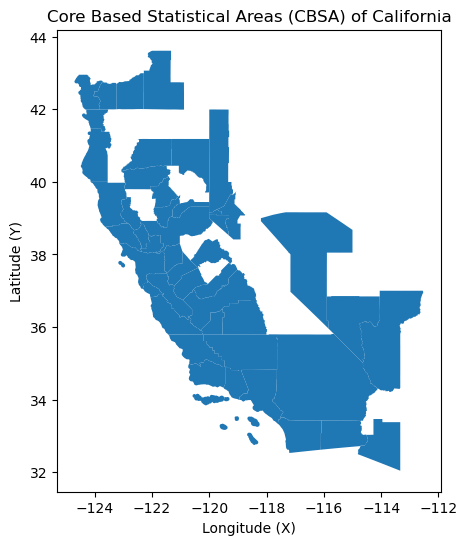

In [13]:
# Plotting the ca_cbsas data
fig, ax = plt.subplots(figsize=(8, 6))
ca_cbsas.plot(ax=ax)
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.title("Core Based Statistical Areas (CBSA) of California")
plt.show()

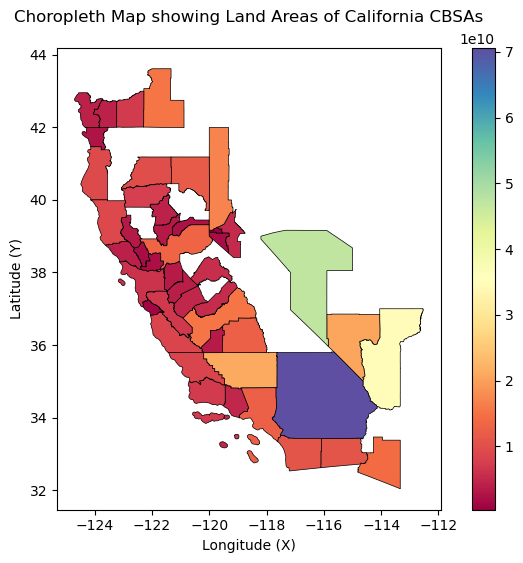

In [26]:
# Plotting simple choropleth map on ca_cbsas data
fig, ax = plt.subplots(figsize=(8, 6))
ca_cbsas.plot(ax=ax,
              cmap="Spectral",
              column="ALAND",
              edgecolor="black",
              linewidth=0.5,
              legend=True
             )
plt.title("Choropleth Map showing Land Areas of California CBSAs\n")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.show()

In [28]:
# Plotting the choropleth map of world's population
world_pop = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_pop.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


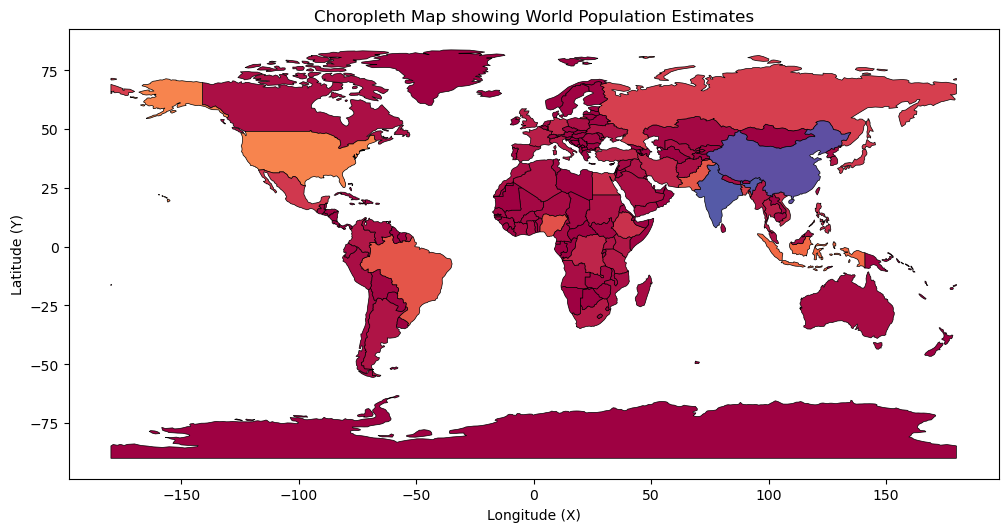

In [69]:
fig, ax = plt.subplots(figsize=(12, 10))
world_pop.plot(ax=ax,
               column="pop_est",
               cmap="Spectral",
               edgecolor="black",
               linewidth=0.5
              )
plt.title("Choropleth Map showing World Population Estimates")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.show()